# Bài tập lập trình: Logistic Regression

```
ProtonX - TensorFlow Class
```

### Hướng dẫn làm bài
- Trong bài tập này bạn sẽ sử dụng Python 3.


### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**


Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO` và thay thế các vị trí `None`.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó.

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Phải có log quá trình training
* Độ chính xác mô hình trên 89%

In [3]:
!wget https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

--2023-12-13 15:19:53--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘marks.txt’

marks.txt           100%[===================>]   3.69K  --.-KB/s    in 0s      

2023-12-13 15:19:53 (53.1 MB/s) - ‘marks.txt’ saved [3775/3775]



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('marks.txt')

In [6]:
X = df.iloc[:, :-1]

In [ ]:
df

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [7]:
Y = df.iloc[:, -1]

Hiển thị dữ liệu

In [8]:
reds = df.loc[Y == 0] # Reds: 0

In [9]:
blues = df.loc[Y == 1] # Blues: 1

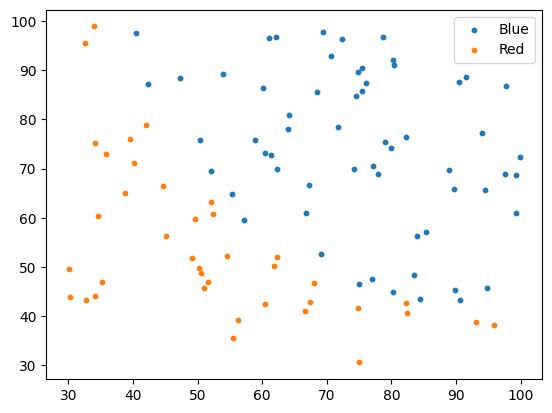

In [10]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

Tách thành bộ Train và Test

In [11]:
X = df.iloc[:, :-1]
# X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
Y = df.iloc[:, -1]
print(Y.shape)
Y = np.reshape(Y.to_numpy(), (Y.shape[0], 1))
print(Y.shape)

(99,)
(99, 1)


In [12]:
trainX, testX = X[:80], X[80:]
trainY, testY = Y[:80], Y[80:]

In [19]:
theta = np.random.normal(size=3).reshape((3, 1))
# trainX@theta

Định nghĩa các hàm

In [13]:
def cal_z(x, theta):
    """
    Parameters
    ----------
    x shape: (m, 3)
    theta shape: (3, 1)
    Returns
    ----------
    z shape (m, 1)
    """
    # TODO 1
    z = x@theta
    return z

In [14]:
def sigmoid(z):
    """
    Parameters
    z shape: (m, 1)
    Returns
    output shape: (m, 1)
    """
    # TODO 2
    sigmoid_f = 1 / (1+np.exp(-z))
    return sigmoid_f

In [15]:
def cal_h_theta(x, theta):
    """
    Parameters
    ----------
    x shape: (m, 3)
    theta shape: (3, 1)
    Returns
    ----------
    output shape: (m, 1)
    """
    # TODO 3
    z = cal_z(x,theta)
    h_theta = sigmoid(z)
    return h_theta

In [23]:
# np.log(2)
print(np.concatenate((trainX, np.ones((trainX.shape[0], 1))), axis=1).shape)
print(theta.shape)
cal_h_theta(np.concatenate((trainX, np.ones((trainX.shape[0], 1))), axis=1), theta).shape

(80, 3)
(3, 1)


(80, 1)

In [ ]:
def cost_func(x, y, theta):
    m = len(x)
    """
    Parameters
    ----------
    x shape: (m, 3)
    y shape: (m, 1)
    theta shape: (3, 1)
    Returns
    ----------
    loss: float
    """
    # TODO 4
    h_theta = cal_h_theta(x, theta)
    ll_theta = - 1/m * sum((y*np.log(h_theta) + (1-y)*np.log(1-h_theta)))
    return ll_theta

In [ ]:
# cost_func(x = trainX, y = trainY, theta = theta)

In [ ]:
def gradient(X, y, theta):
    m = len(X)
    """
    Parameters
    ----------
    X shape: (m, 3)
    y shape: (m, 1)
    theta shape: (3, 1)
    Returns
    ----------
    grad shape: (3, 1)
    """
    # TODO 5
    h_theta = cal_h_theta(X, theta)
    grad = 1/m*X.T.dot(h_theta - y)
    return grad

In [ ]:
trainX

,34.62365962451697,78.0246928153624
0,30.286711,43.894998
1,35.847409,72.902198
2,60.182599,86.308552
3,79.032736,75.344376
4,45.083277,56.316372
...,...,...
75,47.264269,88.475865
76,50.458160,75.809860
77,60.455556,42.508409
78,82.226662,42.719879


Chuẩn hóa dữ liệu

In [ ]:
# Đưa về phân phối chuẩn đơn vị trên cả tập train và test + không sử dụng thư viện ngoài numpy
def normalize_data(train_x, test_x):
    # TODO 6 + 7

    train_mean = np.mean(train_x,axis = 0)
    train_std = np.std(train_x,axis = 0)

    train_x = (train_x - train_mean) / train_std
    test_x = (test_x - train_mean) / train_std
    return train_x, test_x

In [ ]:
# print('after:' ,trainX)
trainX, testX = normalize_data(trainX, testX)
# print('after:' ,trainX)

Tiến hành training

In [ ]:
trainX = np.concatenate((trainX, np.ones((trainX.shape[0], 1))), axis=1)
testX = np.concatenate((testX, np.ones((testX.shape[0], 1))), axis=1)

In [ ]:
theta = np.random.normal(size=3).reshape((3, 1))

In [ ]:
epochs = 10000
learning_rate = 0.01
for e in range(epochs):
    # TODO 8: Tính gradient
    grad = gradient(X = trainX, y = trainY, theta = theta)

    # TODO 9: Update theta
    theta = theta - learning_rate * grad
    # TODO 10
    total_cost = cost_func(x = trainX, y = trainY, theta = theta)


    if e % 100 == 0:
        print(total_cost)

print('Training finished')

[0.2032155]
[0.20319274]
[0.20317037]
[0.20314839]
[0.20312677]
[0.20310552]
[0.20308463]
[0.2030641]
[0.20304391]
[0.20302405]
[0.20300453]
[0.20298534]
[0.20296647]
[0.20294791]
[0.20292966]
[0.2029117]
[0.20289405]
[0.20287669]
[0.20285961]
[0.20284281]
[0.20282629]
[0.20281004]
[0.20279405]
[0.20277832]
[0.20276285]
[0.20274763]
[0.20273265]
[0.20271792]
[0.20270342]
[0.20268916]
[0.20267512]
[0.20266131]
[0.20264772]
[0.20263435]
[0.20262119]
[0.20260823]
[0.20259549]
[0.20258294]
[0.20257059]
[0.20255844]
[0.20254648]
[0.2025347]
[0.20252311]
[0.20251171]
[0.20250048]
[0.20248942]
[0.20247854]
[0.20246782]
[0.20245727]
[0.20244689]
[0.20243667]
[0.2024266]
[0.20241669]
[0.20240693]
[0.20239732]
[0.20238786]
[0.20237854]
[0.20236936]
[0.20236033]
[0.20235143]
[0.20234267]
[0.20233404]
[0.20232554]
[0.20231717]
[0.20230893]
[0.20230081]
[0.20229281]
[0.20228493]
[0.20227717]
[0.20226953]
[0.202262]
[0.20225459]
[0.20224729]
[0.20224009]
[0.202233]
[0.20222602]
[0.20221914]
[0.20221

Tiến hành dự đoán

In [ ]:
predicted_classes = (cal_h_theta(testX, theta) >= 0.5).astype(int)

In [ ]:
accuracy = np.mean(predicted_classes == testY) * 100

In [ ]:
accuracy

89.47368421052632

Yêu cầu độ chính xác lớn hơn 89%

In [ ]:
accuracy > 89

True